# `Matplotlib annotations`


In [1]:
import pandas as pd
import duckdb as db

df = pd.read_csv('data/1900-census-immigrant-pop-metro.csv')


In [2]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [3]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]

df_nordic = df_nordic.fillna("0")

for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [4]:
df_nordic.head(5)

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,0,5,"2,991"
4,32,4,3,5,"3,301"


In [5]:
import duckdb

df_nordic = duckdb.query(
    """--sql
    WITH nordic AS (
        FROM df
            SELECT 
                state, 
                SUM("Total foreign born") AS "Total foreigners",
                SUM(sweden) AS Swedes,
                SUM(norway) AS Norwegians,
                SUM(denmark) AS Danish,
                SUM(finland) AS Finnish,
            GROUP BY
             state
    )
    FROM nordic n 
    SELECT *, n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
    ORDER BY 
        nordic 
    DESC
"""
).df()

df_nordic.head()

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


# TODO for me 
- more visualizations on Nordic
- more visualizations on Total foreigners   
- ex bar charts for different states 
- compare nordic to toal foreigners

In [6]:
df_nordic.shape

(39, 7)

In [7]:
import matplotlib.pyplot as plt 



top_3_nordic = (
    df_nordic.drop(["Total foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]
)
top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


# Annotate


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

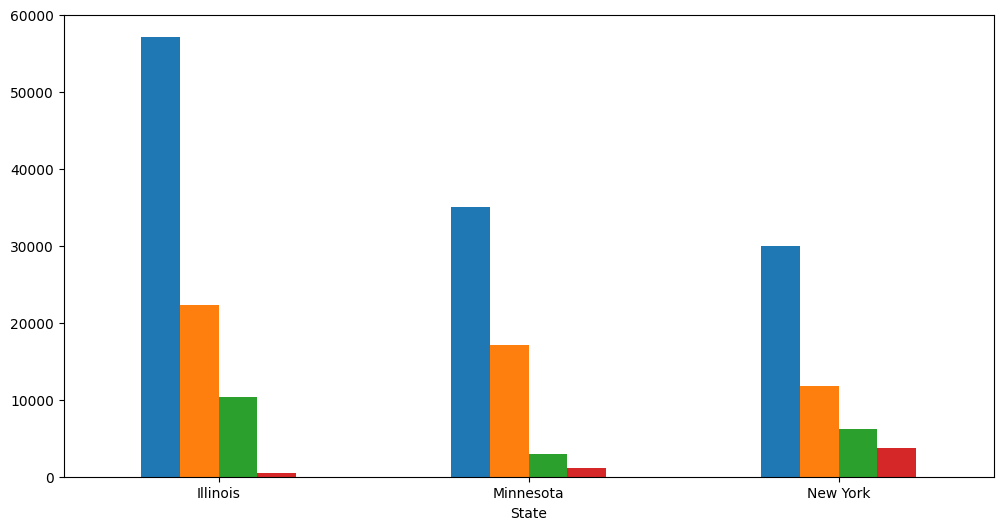

In [8]:
def nordic_plot():
    ax = top_3_nordic.plot(kind = "bar", figsize=(12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)

    fig = ax.get_figure()
    ax.legend_.remove()
    return fig, ax

nordic_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

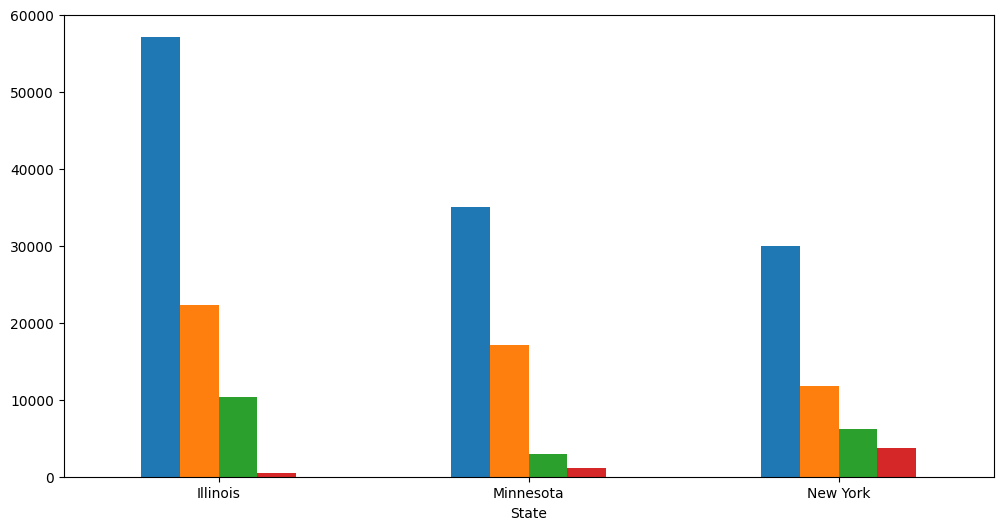

In [9]:
fig, ax = nordic_plot()

ax.containers

Text(0.8, 42000, 'Swedes')

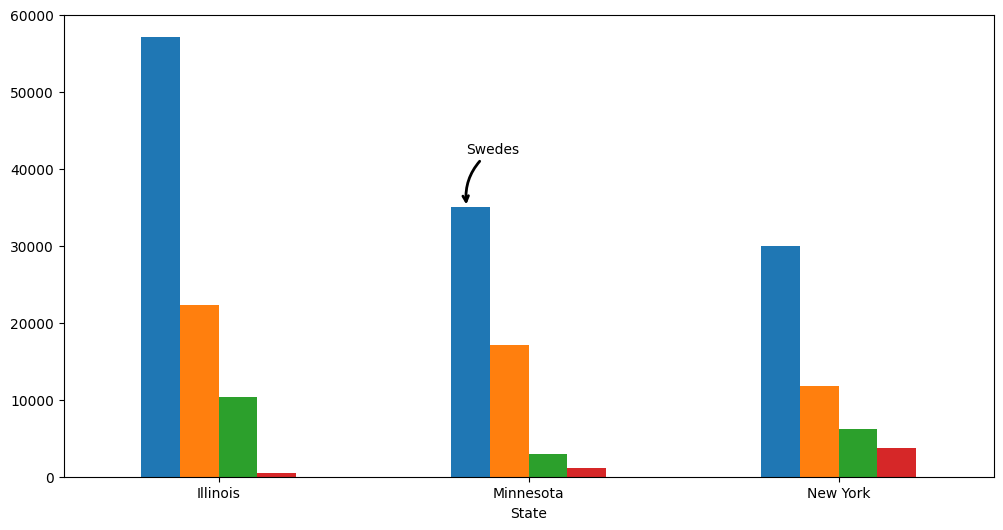

In [10]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle="arc3, rad=.3")
ax.annotate(text="Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(0.8, 42000))

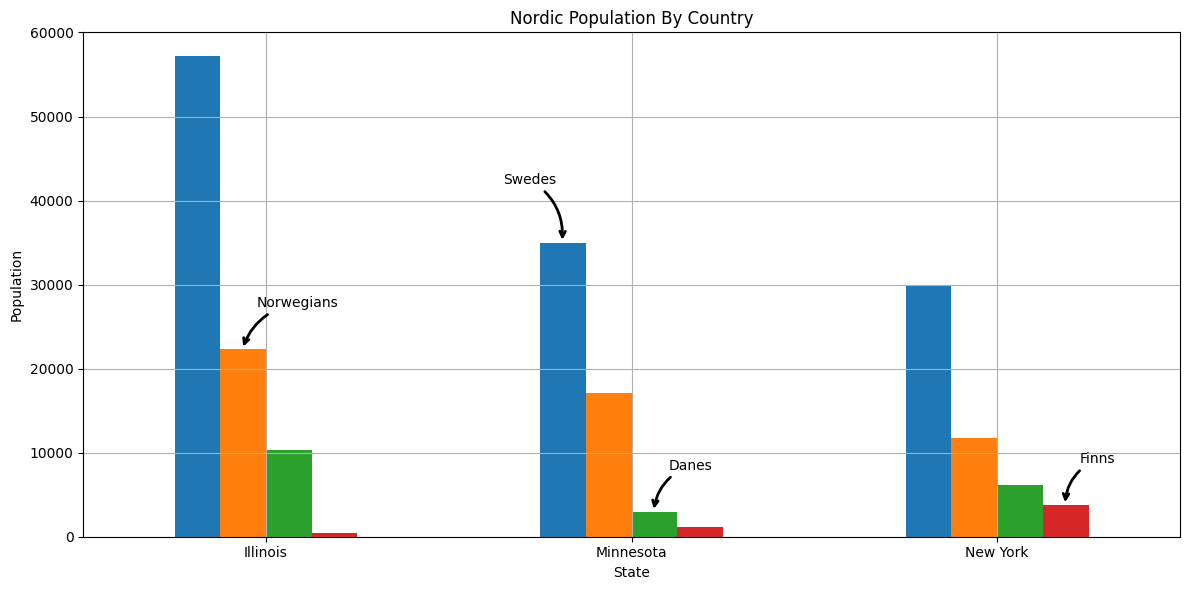

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

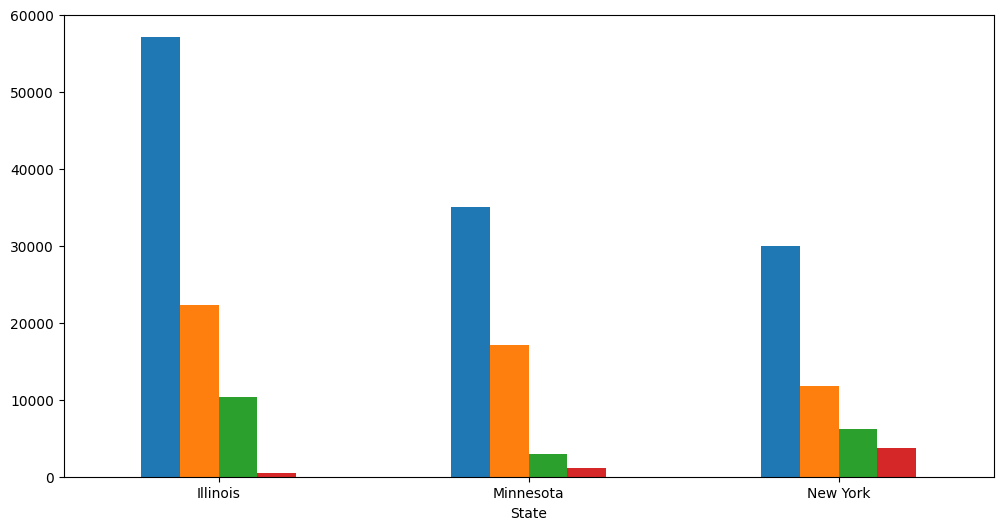

In [ ]:
fig, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers



def annotate_nordic(bar_artist, text, x_offset, y_offset,rad=-0.3):

    xy = (bar_artist.get_x(), bar_artist.get_height())

  
    

    arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3, rad={rad}")
    
    ax.annotate(
        text=text,
        xy=(xy[0] + 0.06, xy[1]),
        arrowprops=arrowprops,
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
    )




annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000, rad= -0.3)
annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000,rad= 0.3)
annotate_nordic(danish_bars[1]  , "Danes", 0.1, 5000,rad = 0.3)
annotate_nordic(finnish_bars[2], "Finns",0.1, 5000, rad= 0.3)

plt.title("Nordic Population By Country")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig('../plots/nordic_plot.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()



In [18]:
import matplotlib.pyplot as plt

def plot_nordic_population():
    fig, ax = nordic_plot()

    swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

    def annotate_nordic(bar_artist, text, x_offset, y_offset, rad=-0.3):
        xy = (bar_artist.get_x(), bar_artist.get_height())
        arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3, rad={rad}")
        ax.annotate(
            text=text,
            xy=(xy[0] + 0.06, xy[1]),
            arrowprops=arrowprops,
            xytext=(xy[0] + x_offset, xy[1] + y_offset),
        )

    annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000, rad=-0.3)
    annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000, rad=0.3)
    annotate_nordic(danish_bars[1], "Danes", 0.1, 5000, rad=0.3)
    annotate_nordic(finnish_bars[2], "Finns", 0.1, 5000, rad=0.3)
    ax.spines[["top", "right"]].set_visible(False)
    plt.title("Nordic Population By Country")
    plt.ylabel("Population")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('../plots/nordic_plot.png', dpi=300, bbox_inches='tight')
    plt.show()


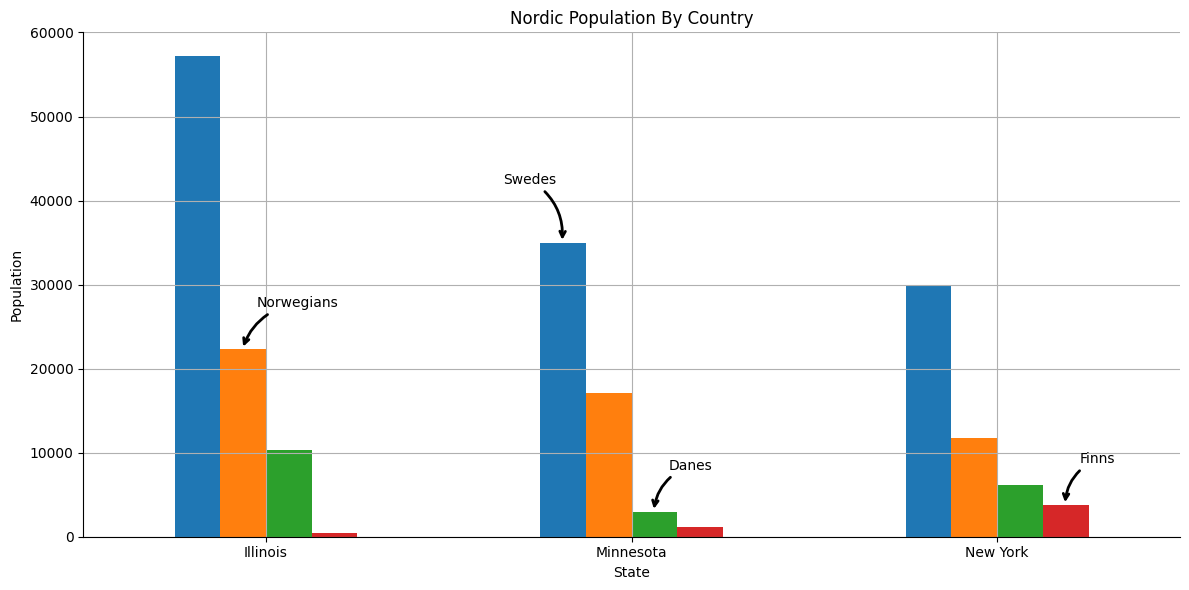

In [17]:
plot_nordic_population()